In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import psychopy.visual as visual
import psychopy.event as event
import psychopy.core as core

import numpy as np
import time
import pdb

In [40]:

def zero_search(arr,startat):
# startat allows skip for for startat letters
    plt.plot(arr)
    @print len(arr), np.max(arr)
    idx=np.max( np.arange(len(arr[startat:]))[arr[startat:]>0] )+startat
    return idx

def process_win(myWin,startat=0):
    buf2=myWin._getFrame("back")
    bw=np.mean(np.array(buf2),2)
    vertical_sum=np.sum(bw,0)
    vertical_sum = vertical_sum - np.min(vertical_sum)
    
#    print "MAX:", np.max(vertical_sum)
                         
    vertical_sum = vertical_sum / np.max(vertical_sum)
    vertical_sum = vertical_sum * height # + height
    return bw,vertical_sum,zero_search(vertical_sum,startat)

MAX: 2364.0
500 50.0
MAX: 4826.0
500 50.0
MAX: 4826.0
500 50.0
31 175 [-250.   25.]
MAX: 4826.0
500 50.0
500 50.0
1183.5423 	WARNING 	Monitor specification not found. Creating a temporary one...


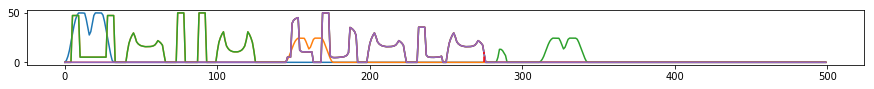

In [12]:
color_text=(-0.5,-0.5,-0.5)
color_text_calc=(1,1,1)

plt.figure(figsize=(15,1.0))

height=50
total_width=500

sentence="This is a, test."

myWin = visual.Window((total_width,height*1.0), allowGUI=True, units='pix', color=(0.0,0.0,0.0) )
myWin.setMouseVisible(False)
myWin.setRecordFrameIntervals(True)

pos_left=np.array([-total_width/2.0,height/2.0]) 
text = visual.TextStim(myWin,pos=pos_left,alignHoriz='left', alignVert='top', height=height, color=color_text_calc,text="Hello there")

myWin.clearBuffer()
text.setText("X")
text.draw()
bw,vertical_sum,end_X=process_win(myWin)
myWin.clearBuffer()
text.setText("Hello X")
text.draw()
bw,vertical_sum,word_end=process_win(myWin)

myWin.clearBuffer()
text.setText("Hello there, X")
text.draw()
bw,vertical_sum,word2_X=process_win(myWin)

myWin.clearBuffer()
color_text2=(1,1,1)
print end_X,word_end,pos_left
text2 = visual.TextStim(myWin,pos=pos_left+[word_end-end_X,0], #+word_end-end_X,
                    alignHoriz='left', alignVert='top', height=height,
                    color=color_text2)
text2.setText('there')
text2.draw()

bw,vertical_sum,with_other=process_win(myWin,0)

text.color=(0,1,0)
text.pos=text.pos+(0,5)
text.draw()
text2.draw()

myWin.flip()
myWin.getMovieFrame()
myWin.saveMovieFrames('screenshot.png')
                      
#plt.xlim(0,total_width)
#plt.imshow(bw)

#plt.subplot(2,1,1)

#plt.plot( vertical_sum )

word_end=zero_search(vertical_sum,10)

plt.plot( [word_end]*2,[0,10], 'r--' )

#plt.subplot(2,1,2)
myWin.close()
#plt.grid()
#plt.show()

In [67]:
def get_paragraph(nParagraph):
    fil=open("wikipedia_passages_comprehension.csv","rt")
    lines=fil.readlines()
    fil.close()
    para=lines[nParagraph]
    fields=para.split('\t')
    return fields[1].decode('utf-8')

In [68]:
get_paragraph(0)

u'"Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24\u201310 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the ""golden anniversary"" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as ""Super Bowl L""), so that the logo could prominently feature the Arabic numerals 50."'

17518.0930 	WARNING 	Monitor specification not found. Creating a temporary one...
17520.3603 	WARNING 	t of last frame was 163.06ms (=1/6)


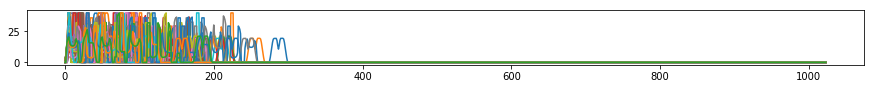

In [82]:
color_text=(-0.5,-0.5,-0.5)
color_text_calc=(1,1,1)
color_text_draw=(-1,-1,-1)

color_back_calc=(0,0,0)
color_back_draw=(1,1,1)

plt.figure(figsize=(15,1.0))

height=40
line_spacing=1.16 # how many "heights" to move between lines

total_width=1024
height_pixels=768
nlines=20

#display_size=(total_width,height*nlines)
#pos_left=np.array([-total_width/2.0,nlines/2.0*height]) 
display_size=(total_width,height_pixels)
pos_left=np.array([-total_width/2.0,height_pixels/2.0]) 


myWin = visual.Window(display_size, allowGUI=True, units='pix', color=color_back_calc )
text = visual.TextStim(myWin,pos=pos_left,alignHoriz='left', alignVert='top',
                       height=height, color=color_text_calc,text="Hello there"*100)

text.wrapWidth=total_width

myWin.setMouseVisible(False)
myWin.setRecordFrameIntervals(True)

#sentence="Wow, I cannot believe this is really happening. I am ecstatic. " * 2
sentence=get_paragraph(101)
words=sentence.split(" ")
nwords=len(words)

xlocs=np.zeros(nwords)

myWin.clearBuffer()
text.setText("X")
text.draw()
bw,vertical_sum,end_X=process_win(myWin)

for nword in np.arange(nwords):
    myWin.clearBuffer()
    txt="%s X"%words[nword]
    #print txt,
    text.setText(txt)
    text.draw()
    
    bw,vertical_sum,word_end=process_win(myWin)
    xlocs[nword]=word_end-end_X

stims_words = [visual.TextStim(myWin,pos=pos_left,alignHoriz='left', alignVert='top',
                               height=height, 
                               color=color_text_draw) for n in np.arange(nwords) ]

myWin.clearBuffer() 
myWin.color=color_back_draw
myWin.flip()
# See httphttp://www.psychopy.org/api/visual/window.html://www.psychopy.org/api/visual/window.html
#text.setText(sentence)
#text.color=(0,1,0)
#text.draw()

posx=pos_left[0]
posy=pos_left[1]

for nword in np.arange(nwords):
    #print words[nword],posx,posx+xlocs[nword]
    
    if (posx+xlocs[nword]-end_X) >= total_width/2.0:
        posx=pos_left[0]
        posy -= height*line_spacing
        
    txt=words[nword]
    #stims_words[nword].color=np.random.uniform(size=(3))
    stims_words[nword].pos=[posx,posy]
    stims_words[nword].setText(txt)
    stims_words[nword].draw()
    posx += xlocs[nword]
    
myWin.flip()
myWin.getMovieFrame()
myWin.saveMovieFrames('screenshot.png')
myWin.close()

In [70]:
myWin.close()

In [30]:
text.wrapWidth

500